In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ElNiño'

/content/drive/MyDrive/ElNiño


In [3]:
!pip install cartopy
!pip install geoviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.6.1
    Uninstalling bokeh-3.6.1:
      Successfully uninstalled bokeh-3.6.1


In [4]:
# imports
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import os
import pooch
import tempfile
import holoviews
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from geoviews import Dataset as gvDataset
import geoviews.feature as gf
from geoviews import Image as gvImage

# Oceanic Niño Index


In [ ]:
# download the monthly sea surface temperature data from NOAA Physical System
# Laboratory. The data is processed using the OISST SST Climate Data Records
# from the NOAA CDR program.
# the data downloading may take 2-3 minutes to complete.
# filename=sst.mon.mean.nc
# url_sst = "https://osf.io/6pgc2/download/"
filename = "sst.mon.mean.nc"

# we divide the data into small chunks to allow for easier memory manangement. this is all done automatically, no need for you to do anything
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 499, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [ ]:
# get 30-year climatology from 1982-2011
sst_30yr = ds.sst.sel(time=slice("1982-01-01", "2011-12-01"))

# calculate monthly climatology
sst_clim = sst_30yr.groupby("time.month").mean()
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 720, lon: 1440)> Size: 50MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7287635, -1.7287527, -1.7286991, ..., -1.7289138,
         -1.7288492, -1.7288171],
        [-1.7309034, -1.7308818, -1.7308711, ..., -1.7310214,
         -1.7309357, -1.7309357],
        [-1.7318065, -1.7318065, -1.7318065, ..., -1.7318172,
         -1.7318172, -1.7318065]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.6975776, -1.6975553, -1.6975553, ..., -1.6976665,
         -1.6976444, -1.697611 ],
        [-1.6984556, -1.6984445, -1.6984445, ..., -1.698489 ,
         -1.698489 , -1.6984779],
        [-1.6989446, -1.6989446, -1.6989446, ..., -1.6989557,
         -1.6989446, -1.6989446]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7280643, -1.7280537, -1.7279783, ..., -1.7281611,
         -1.728129 , -1.728086 ],
        [-1.7293116, -1.7292687, -1.7292794, ..., -1.7293333,
         -1.7293332, -1.7293332],
        [-1.7297848, -1.7297848, -1.7297741, ..., -1.7297956,
         -1.7297956, -1.7297956]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Monthly Mean of Sea Surface Temperature
    units:          degC
    valid_range:    [-3. 45.]
    precision:      2.0
    dataset:        NOAA High-resolution Blended Analysis
    var_desc:       Sea Surface Temperature
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Individual Observations
    actual_range:   [-1.8  32.14]
    standard_name:  sea_surface_temperature

In [ ]:
# calculate monthly anomaly
sst_anom = ds.sst.groupby("time.month") - sst_clim
sst_anom

<xarray.DataArray 'sst' (time: 499, lat: 720, lon: 1440)> Size: 2GB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.01085567, -0.01088893, -0.01158917, ..., -0.01072216,
         -0.01075542, -0.0104444 ],
        [-0.01407778, -0.01444435, -0.01443326, ..., -0.01364458,
         -0.01367784, -0.01403344],
        [-0.01648879, -0.01648879, -0.01648879, ..., -0.01645553,
         -0.01646662, -0.01647782]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.00019252, -0.01161695, -0.01914048, ..., -0.02573752,
         -0.01934457, -0.00403416],
        [-0.00681448, -0.0332433 , -0.04361224, ..., -0.0489099 ,
         -0.0392909 , -0.01251709],
        [-0.06280601, -0.06280601, -0.06280601, ..., -0.06280601,
         -0.06280601, -0.06280601]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.00821507, -0.00633335, -0.01377428, ..., -0.02069879,
         -0.01104295,  0.00568819],
        [ 0.00094604, -0.02874207, -0.03938723, ..., -0.03993535,
         -0.02898932,  0.0009892 ],
        [-0.05611825, -0.05611825, -0.05612886, ..., -0.0561074 ,
         -0.0561074 , -0.0561074 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
    month    (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 ... 6 7 8 9 10 11 12 1 2 3

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


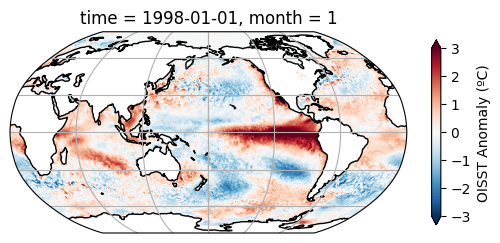

In [ ]:
sst = sst_anom.sel(time="1998-01-01")

# initiate plot
fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.Robinson(central_longitude=180)},
    #figsize=(9, 6)
)

# focus on the ocean with the central_longitude=180
ax.coastlines()
ax.gridlines()
sst.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmin=-3,
    vmax=3,
    cmap="RdBu_r",
    cbar_kwargs=dict(shrink=0.5, label="OISST Anomaly (ºC)"),
)

In [ ]:
# extract SST data from the Niño 3.4 region
sst_nino = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240))
sst_nino

# if we want to analyze stuff happening in the coast of Peru, it might be better
# to use the Niño 1+2 region. In that case, use
# sst_nino = sst_anom.sel(lat=slice(-10, 0), lon=slice(80, 90))
# sst_nino

<xarray.DataArray 'sst' (time: 499, lat: 40, lon: 200)> Size: 16MB
array([[[-6.69525146e-01, -6.80366516e-01, -6.93876266e-01, ...,
          2.76653290e-01,  2.96335220e-01,  3.01664352e-01],
        [-6.83284760e-01, -7.06535339e-01, -6.82203293e-01, ...,
          3.08546066e-01,  3.20869446e-01,  3.17598343e-01],
        [-7.16913223e-01, -7.02375412e-01, -6.67095184e-01, ...,
          3.28367233e-01,  3.47665787e-01,  3.56067657e-01],
        ...,
        [-2.94645309e-01, -2.72735596e-01, -2.93779373e-01, ...,
          3.79093170e-01,  4.22355652e-01,  3.72625351e-01],
        [-3.81984711e-01, -2.99722672e-01, -2.78633118e-01, ...,
          4.87499237e-01,  4.94678497e-01,  4.14009094e-01],
        [-4.47055817e-01, -3.37280273e-01, -2.42832184e-01, ...,
          4.76043701e-01,  4.41780090e-01,  3.42708588e-01]],

       [[-5.48688889e-01, -4.62980270e-01, -4.14043427e-01, ...,
         -1.21023178e-01, -7.19280243e-02, -3.16982269e-02],
        [-5.57636261e-01, -4.85677719e-01, -4.24419403e-01, ...,
         -1.35051727e-01, -9.95388031e-02, -8.07533264e-02],
        [-5.09346008e-01, -4.74029541e-01, -4.20312881e-01, ...,
         -1.26333237e-01, -1.30105972e-01, -1.29806519e-01],
...
         -6.95724487e-02, -8.14132690e-02, -9.69467163e-02],
        [-1.11291885e-01, -1.01837158e-01, -8.91838074e-02, ...,
         -6.76612854e-02, -6.63089752e-02, -7.35282898e-02],
        [-3.26271057e-02, -2.59494781e-02, -1.38664246e-02, ...,
         -9.23175812e-02, -8.33759308e-02, -7.82756805e-02]],

       [[-1.97212219e-01, -2.21448898e-01, -2.37428665e-01, ...,
          4.06059265e-01,  4.29023743e-01,  4.36105728e-01],
        [-2.03422546e-01, -2.19320297e-01, -2.30052948e-01, ...,
          4.61603165e-01,  4.77806091e-01,  4.79442596e-01],
        [-2.02465057e-01, -2.01200485e-01, -2.02280045e-01, ...,
          5.09149551e-01,  5.22302628e-01,  5.18348694e-01],
        ...,
        [ 3.83634567e-01,  3.89268875e-01,  3.86335373e-01, ...,
          4.00333405e-02,  4.61101532e-02,  6.12697601e-02],
        [ 3.96579742e-01,  4.01939392e-01,  3.97485733e-01, ...,
          1.56135559e-02,  2.57549286e-02,  4.84733582e-02],
        [ 3.84754181e-01,  3.85297775e-01,  3.85581970e-01, ...,
          7.38334656e-03,  2.79140472e-02,  5.29689789e-02]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-03-01
  * lat      (lat) float32 160B -4.875 -4.625 -4.375 ... 4.375 4.625 4.875
  * lon      (lon) float32 800B 190.1 190.4 190.6 190.9 ... 239.4 239.6 239.9
    month    (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 ... 6 7 8 9 10 11 12 1 2 3

In [ ]:
# calculate the mean values for the Nino 3.4 region
nino = sst_nino.mean(dim=["lat", "lon"])

In [ ]:
nino.to_netcdf('nino_timeseries.nc')
nino_ds = xr.open_dataset('nino_timeseries.nc')
nino = nino_ds.sst

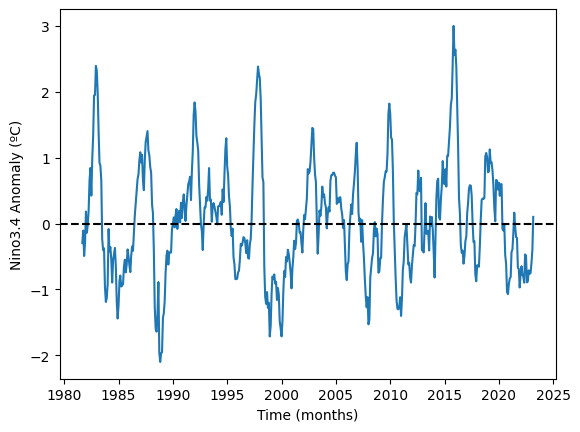

In [ ]:
# plot time series for Nino 3.4 mean anomaly
fig, ax = plt.subplots()
nino.plot(ax=ax)
# aesthetics
ax.set_xlabel("Time (months)")
ax.set_ylabel("Nino3.4 Anomaly (ºC)")
ax.axhline(y=0, color="k", linestyle="dashed")

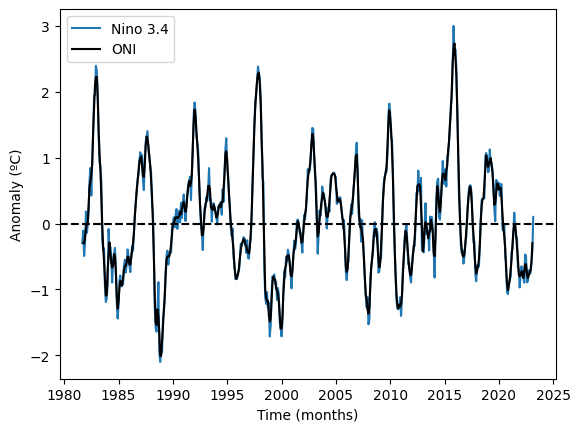

In [ ]:
# calculate 3-month rolling mean of Nino 3.4 anomaly for the ONI
oni = nino.rolling(time=3, center=True).mean()

# generate time series plot
fig, ax = plt.subplots()
nino.plot(label="Nino 3.4", ax=ax)
oni.plot(color="k", label="ONI", ax=ax)
# aesthetics
ax.set_xlabel("Time (months)")
ax.set_ylabel("Anomaly (ºC)")
ax.axhline(y=0, color="k", linestyle="dashed")
ax.legend()

Text(0, 0.5, 'ONI')

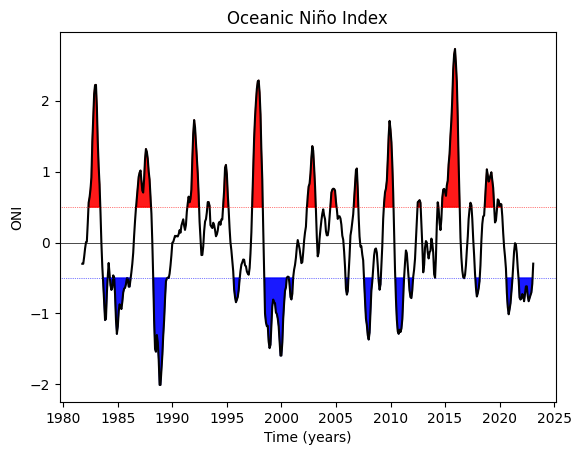

In [ ]:
# set up the plot size
fig, ax = plt.subplots()

# create the filled area when ONI values are above 0.5 for El Nino
ax.fill_between(
    oni.time.data,
    oni.where(oni >= 0.5).data,
    0.5,
    color="red",
    alpha=0.9,
)

# create the filled area when ONI values are below -0.5 for La Nina
ax.fill_between(
    oni.time.data,
    oni.where(oni <= -0.5).data,
    -0.5,
    color="blue",
    alpha=0.9,
)

# create the time series of ONI
oni.plot(color="black", ax=ax)

# add the threshold lines on the plot
ax.axhline(0, color="black", lw=0.5)
ax.axhline(0.5, color="red", linewidth=0.5, linestyle="dotted")
ax.axhline(-0.5, color="blue", linewidth=0.5, linestyle="dotted")
# aesthetics
ax.set_title("Oceanic Niño Index")
ax.set_xlabel('Time (years)')
ax.set_ylabel('ONI')

In [ ]:
df

,month,sst,year
time,,,
1981-09-01,9,NaN,1981
1981-10-01,10,-0.299151,1981
1981-11-01,11,-0.299240,1981
1981-12-01,12,-0.202915,1981
1982-01-01,1,-0.085143,1982
...,...,...,...
2022-11-01,11,-0.741899,2022
2022-12-01,12,-0.704129,2022
2023-01-01,1,-0.581485,2023


In [ ]:
df = oni.to_dataframe()

# # Create a column for the year
df['year'] = df.index.year

In [ ]:
# Save the file
df.to_csv('/content/drive/My Drive/ElNiño/ONI_data.csv', index=True)

# If necessary, load the data
# df = pd.read_csv('/content/drive/My Drive/ElNiño/ONI_data.csv')

In [ ]:
fig = px.line(x=df.index, y=df['sst'])
# Update layout
fig.update_layout(
    title="ONI Fluctuations",
    xaxis_title="Time",
    yaxis_title="ONI",
)
fig.show()

Let us define El Niño, Neutral and La Niña phenomena according to the following coditions:

- El Niño $\rightarrow y\ge0.5$
- Neutral $\rightarrow -0.5\lt y\gt0.5$
- La Niña $\rightarrow y\le-0.5$

In [ ]:
df['ElNiño'] = df['sst'].where(df['sst'] >= 0.5)  # El Niño: ONI >= 0.5
df['LaNiña'] = df['sst'].where(df['sst'] <= -0.5) # La Niña: ONI <= -0.5
df['Neutral'] = df['sst'].where((df['sst'] > -0.5) & (df['sst'] < 0.5))  # Neutral: -0.5 < ONI < 0.5

In [ ]:
# Create the figure
fig = go.Figure()

# Add El Niño sections (ONI >= 0.5) in red
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['ElNiño'],
    mode='lines',
    line=dict(color='red'),
    name='El Niño (ONI >= 0.5)'
))

# Add La Niña sections (ONI <= -0.5) in blue
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['LaNiña'],
    mode='lines',
    line=dict(color='blue'),
    name='La Niña (ONI <= -0.5)'
))

# Add Neutral sections (-0.5 < ONI < 0.5) in gray
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Neutral'],
    mode='lines',
    line=dict(color='gray'),
    name='Neutral (-0.5 < ONI < 0.5)'
))

# Add horizontal lines for thresholds
fig.add_hline(y=0.5, line_dash="dash", line_color="red", annotation_text="El Niño Threshold")
fig.add_hline(y=-0.5, line_dash="dash", line_color="blue", annotation_text="La Niña Threshold")

# Update layout
fig.update_layout(
    title="ONI Classification",
    xaxis_title="Time",
    yaxis_title="ONI",
    legend_title="Classification",
    template="plotly_white"
)

# Show plot
fig.show()

In [ ]:
df

,month,sst,year,ElNiño,LaNiña,Neutral
time,,,,,,
1981-09-01,9,NaN,1981,NaN,NaN,NaN
1981-10-01,10,-0.299151,1981,NaN,NaN,-0.299151
1981-11-01,11,-0.299240,1981,NaN,NaN,-0.299240
1981-12-01,12,-0.202915,1981,NaN,NaN,-0.202915
1982-01-01,1,-0.085143,1982,NaN,NaN,-0.085143
...,...,...,...,...,...,...
2022-11-01,11,-0.741899,2022,NaN,-0.741899,NaN
2022-12-01,12,-0.704129,2022,NaN,-0.704129,NaN
2023-01-01,1,-0.581485,2023,NaN,-0.581485,NaN


In [ ]:
df.to_csv('/content/drive/My Drive/ElNiño/ONI_data.csv', index=True)

# Global Mean Sea Level

In [ ]:
# Download the global mean sea level data from PO.DAAC. The data can be found in the following link
# url_gmsl = https://search.earthdata.nasa.gov/search/granules?p=C2205556193-POCLOUD&pg[0][v]=f&tl=1732651675.819!3!!
gmsl_file = "/content/drive/My Drive/ElNiño/GMSL_TPJAOS_5.1.txt"

# Read the data from the txt. We can skip the first 55 rows
col_names = ['Altimeter_Type', 'Cycle', 'Year_Fraction', 'Observations', 'Weighted_Observations', 'GMSL_No_GIA', 'Std_Dev_No_GIA',
             'Smoothed_No_GIA', 'GMSL_GIA', 'Std_Dev_GIA', 'Smoothed_GIA', 'Smoothed_GIA_Adjusted', 'Smoothed_No_GIA_Adjusted']
gmsl = pd.read_csv(gmsl_file, sep='\s+', skiprows=52, header=None, names=col_names)

# JUST FOR NOW, IMPORT THE ONI DATA
df = pd.read_csv('/content/drive/My Drive/ElNiño/ONI_data.csv')

In [ ]:
gmsl

,Altimeter_Type,Cycle,Year_Fraction,Observations,Weighted_Observations,GMSL_No_GIA,Std_Dev_No_GIA,Smoothed_No_GIA,GMSL_GIA,Std_Dev_GIA,Smoothed_GIA,Smoothed_GIA_Adjusted,Smoothed_No_GIA_Adjusted
0,0,11,1993.011526,466881,338409.69,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.65
1,0,12,1993.038692,459563,333609.59,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.54
2,0,13,1993.065858,402996,292736.50,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.18
3,0,14,1993.093025,462894,336670.31,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.14
4,0,15,1993.120191,460498,332486.09,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-36.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0,1171,2024.503705,465272,338301.31,62.31,85.23,62.63,69.98,85.35,70.31,72.98,65.30
1160,0,1172,2024.530797,458794,335301.81,64.13,85.50,62.54,71.85,85.81,70.24,71.99,64.29
1161,0,1173,2024.557889,459567,335900.31,61.93,88.04,62.49,69.63,88.43,70.18,70.87,63.18
1162,0,1174,2024.584981,457215,334466.81,62.00,88.66,62.45,69.70,89.11,70.15,69.69,61.99


In [ ]:
# Extract the integer year
gmsl['year'] = gmsl['Year_Fraction'].astype(int)

# Calculate the fraction of the year
fraction_of_year = gmsl['Year_Fraction'] - gmsl['year']

# Convert fraction of the year to a datetime by starting with January 1st and adding the fractional part converted to days

def year_fraction_to_date(year, fraction):
    # Ensure year is an integer by explicitly converting it
    year = int(year)  # Convert year to an integer
    base_date = datetime(year, 1, 1)  # Start of the year
    days_in_year = 366 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 365
    delta_days = fraction * days_in_year
    full_date = base_date + timedelta(days=delta_days)
    return full_date

# Apply the conversion function
gmsl['time'] = gmsl.apply(lambda row: year_fraction_to_date(row['year'], row['Year_Fraction'] - row['year']), axis=1)

# Add a column for the month
gmsl['month'] = gmsl['time'].dt.month

In [ ]:
# Plot the sea level fluctuations
fig = px.line(x=gmsl['time'], y=gmsl['Smoothed_GIA_Adjusted'])
fig.update_layout(
    title="Sea Level Fluctuations",
    xaxis_title="Time",
    yaxis_title="Sea Level Variation (mm)",
)
fig.show()

In [ ]:
# Create a column for the year
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year



,time,month,sst,ElNiño,LaNiña,Neutral,year
0,1981-09-01,9,NaN,NaN,NaN,NaN,1981
1,1981-10-01,10,-0.299151,NaN,NaN,-0.299151,1981
2,1981-11-01,11,-0.299240,NaN,NaN,-0.299240,1981
3,1981-12-01,12,-0.202915,NaN,NaN,-0.202915,1981
4,1982-01-01,1,-0.085143,NaN,NaN,-0.085143,1982
...,...,...,...,...,...,...,...
494,2022-11-01,11,-0.741899,NaN,-0.741899,NaN,2022
495,2022-12-01,12,-0.704129,NaN,-0.704129,NaN,2022
496,2023-01-01,1,-0.581485,NaN,-0.581485,NaN,2023
497,2023-02-01,2,-0.297097,NaN,NaN,-0.297097,2023


In [ ]:
# Merge GMSL and ONI datasets
data = pd.merge(df, gmsl, on=['year','month'], how='inner')

In [ ]:
data

,time_x,month,sst,ElNiño,LaNiña,Neutral,year,Altimeter_Type,Cycle,Year_Fraction,...,Weighted_Observations,GMSL_No_GIA,Std_Dev_No_GIA,Smoothed_No_GIA,GMSL_GIA,Std_Dev_GIA,Smoothed_GIA,Smoothed_GIA_Adjusted,Smoothed_No_GIA_Adjusted,time_y
0,1993-01-01,1,0.297291,NaN,NaN,0.297291,1993,0,11,1993.011526,...,338409.69,-37.91,89.01,-37.67,-37.90,89.01,-37.66,-37.64,-37.65,1993-01-05 04:58:03.936000
1,1993-01-01,1,0.297291,NaN,NaN,0.297291,1993,0,12,1993.038692,...,333609.59,-40.95,89.95,-39.07,-40.94,89.95,-39.06,-38.53,-38.54,1993-01-15 02:56:30.912003
2,1993-01-01,1,0.297291,NaN,NaN,0.297291,1993,0,13,1993.065858,...,292736.50,-41.09,86.90,-39.11,-41.07,86.90,-39.09,-38.16,-38.18,1993-01-25 00:54:57.887998
3,1993-02-01,2,0.332110,NaN,NaN,0.332110,1993,0,14,1993.093025,...,336670.31,-43.38,88.73,-39.40,-43.36,88.73,-39.38,-38.12,-38.14,1993-02-03 22:53:56.399997
4,1993-02-01,2,0.332110,NaN,NaN,0.332110,1993,0,15,1993.120191,...,332486.09,-38.66,89.87,-38.51,-38.63,89.87,-38.48,-36.96,-36.99,1993-02-13 20:52:23.375999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,2023-02-01,2,-0.297097,NaN,NaN,-0.297097,2023,0,1120,2023.119611,...,339213.81,54.41,88.47,54.21,61.75,88.10,61.53,63.05,55.73,2023-02-13 15:47:32.496002
1109,2023-02-01,2,-0.297097,NaN,NaN,-0.297097,2023,0,1121,2023.146777,...,339534.81,53.45,89.38,53.90,60.78,88.99,61.23,62.99,55.66,2023-02-23 13:45:59.471998
1110,2023-03-01,3,NaN,NaN,NaN,NaN,2023,0,1122,2023.173943,...,338340.81,53.27,88.12,53.58,60.59,87.92,60.93,62.93,55.58,2023-03-05 11:44:26.448000
1111,2023-03-01,3,NaN,NaN,NaN,NaN,2023,0,1123,2023.201109,...,336289.69,54.50,86.64,53.18,61.86,86.46,60.54,62.82,55.46,2023-03-15 09:42:53.424003


In [ ]:
# Calculate correlation between ONI and GMSL
correlation = df['sst'].corr(data['Smoothed_No_GIA_Adjusted'])
print(f"Correlation between ONI and GMSL (smoothed, GIA adjusted): {correlation}")

Correlation between ONI and GMSL (smoothed, GIA adjusted): 0.03941614547014206


# Mean Sea Level in Balboa (Panama)

In [ ]:
# Download the monthly mean sea level data in the city of Balboa, Panama.
# This data was taken from the National Oceanography Center, its url is the following:
# url_balbao = https://psmsl.org/data/obtaining/rlr.monthly.data/163.rlrdata
bmsl_file = "/content/drive/My Drive/ElNiño/msl_balboa.txt"
bmsl = pd.read_csv(bmsl_file, sep=';', header=None, names=['Year_Fraction', 'Sea_Level_Measurement', 'Quality_Flag1','Quality_Flag2'])

In [ ]:
# Extract the integer year
bmsl['year'] = bmsl['Year_Fraction'].astype(int)

# Calculate the fraction of the year
fraction_of_year = bmsl['Year_Fraction'] - bmsl['year']

# Convert fraction of the year to a datetime by starting with January 1st and adding the fractional part converted to days

def year_fraction_to_date(year, fraction):
    # Ensure year is an integer by explicitly converting it
    year = int(year)  # Convert year to an integer
    base_date = datetime(year, 1, 1)  # Start of the year
    days_in_year = 366 if (year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)) else 365
    delta_days = fraction * days_in_year
    full_date = base_date + timedelta(days=delta_days)
    return full_date

# Apply the conversion function
bmsl['time'] = bmsl.apply(lambda row: year_fraction_to_date(row['year'], row['Year_Fraction'] - row['year']), axis=1)

# Add a column for the month
bmsl['month'] = bmsl['time'].dt.month

In [ ]:
# Drop the values with negative values (those are probably errors)
bmsl = bmsl[bmsl['Sea_Level_Measurement'] >= 0]

In [ ]:
fig = px.line(x=bmsl['time'], y=bmsl['Sea_Level_Measurement'])
fig.update_layout(
    title="Sea Level Fluctuations in Balboa (Panama Canal)",
    xaxis_title="Time",
    yaxis_title="Sea Level Variation (mm)",
)
fig.show()

In this case, the results look much better. Looks like there is some direct relation between la niña and lower sea level (like the case of 1988); and el niño and high sea levels (like the cases of 1997 and 2005).

In [ ]:
bmsl

,Year_Fraction,Sea_Level_Measurement,Quality_Flag1,Quality_Flag2,year,time,month
0,1908.0417,6836,0,0,1908,1908-01-16 06:17:34.080,1
1,1908.1250,6746,0,0,1908,1908-02-15 18:00:00.000,2
2,1908.2083,6743,0,0,1908,1908-03-17 05:42:25.920,3
3,1908.2917,6836,0,0,1908,1908-04-16 18:17:34.080,4
4,1908.3750,6977,0,0,1908,1908-05-17 06:00:00.000,5
...,...,...,...,...,...,...,...
1351,2020.6250,7179,0,0,2020,2020-08-16 18:00:00.000,8
1352,2020.7083,7167,0,0,2020,2020-09-16 05:42:25.920,9
1353,2020.7917,7191,0,0,2020,2020-10-16 18:17:34.080,10
1354,2020.8750,7202,0,0,2020,2020-11-16 06:00:00.000,11


In [ ]:
# Merge MSL from Balboa and ONI datasets
data = pd.merge(df, bmsl, on=['year','month'], how='inner')

In [ ]:
# Calculate correlation between ONI and MSL from Balboa
correlation = df['sst'].corr(data['Sea_Level_Measurement'])
print(f"Correlation between ONI and BMSL: {correlation}")

Correlation between ONI and BMSL: 0.09282601881337742


# Southern Oscillation Index

In [ ]:
# Download the data of the Southern Oscillation Index from NOAA Climate Prediction Center. The data can be found in
# url_SOI = https://psl.noaa.gov/data/20thC_Rean/timeseries/monthly/SOI/soi.20crv2c.long.data
soi_file = "https://psl.noaa.gov/data/20thC_Rean/timeseries/monthly/SOI/soi.20crv2c.long.data"

col_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_soi = pd.read_csv(soi_file, sep='\s+', skiprows=1, names=col_names)
df_soi = df_soi.apply(pd.to_numeric, errors='coerce')
df_soi.dropna(inplace=True)
df_soi.replace({-99.90 : np.NaN}, inplace=True)
df_soi

,January,February,March,April,May,June,July,August,September,October,November,December
1851,0.430,-0.410,-0.640,-1.371,-0.832,-0.843,-0.502,-0.317,-0.522,-0.622,-0.705,-0.464
1852,-0.294,-1.306,-2.149,-3.789,-0.817,-0.544,-1.732,-0.216,-0.900,-0.901,-1.856,-0.634
1853,0.157,0.557,-0.075,-1.544,0.381,0.183,0.087,0.271,-0.381,0.183,-0.366,-0.284
1854,0.058,-0.154,-1.604,-2.265,-0.096,-1.305,-1.884,-0.933,-0.440,-0.151,-1.236,-0.588
1855,-0.217,0.244,-0.614,-0.812,0.393,0.243,0.779,-0.375,-0.539,-0.075,-1.821,-0.346
...,...,...,...,...,...,...,...,...,...,...,...,...
2010,-1.085,-1.328,-0.845,1.247,0.826,0.069,1.944,1.588,2.250,1.465,1.432,2.400
2011,1.829,1.796,2.015,1.936,-0.370,0.027,0.810,0.188,0.967,0.919,1.303,2.117
2012,0.836,0.346,0.639,0.102,0.383,-0.547,0.016,-0.115,0.389,0.527,0.564,-0.533
2013,-0.076,-0.088,1.335,0.398,1.604,1.823,1.435,0.276,0.471,0.099,1.171,0.434


In [ ]:
# Plot the data
pd.options.plotting.backend = "plotly"
fig = df_soi.plot()
fig.show()

In [ ]:
# Stack all the series
stacked_series = df_soi.stack()
df_soi_stacked = stacked_series.to_frame()
df_soi_stacked.reset_index(inplace=True)
df_soi_stacked.columns = ['year', 'month', 'SOI']

In [ ]:
# Set a the date as the index
df_soi_stacked['time'] = pd.to_datetime(df_soi_stacked['year'] + '-' + df_soi_stacked['month'])
df_soi_stacked['time'] = df_soi_stacked['time'].dt.strftime('%Y-%m-%d')
df_soi_stacked.set_index('time', inplace=True)
df_soi_stacked

<ipython-input-40-875f3c55f562>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,year,month,SOI
time,,,
1851-01-01,1851,January,0.430
1851-02-01,1851,February,-0.410
1851-03-01,1851,March,-0.640
1851-04-01,1851,April,-1.371
1851-05-01,1851,May,-0.832
...,...,...,...
2014-08-01,2014,August,-0.754
2014-09-01,2014,September,-0.680
2014-10-01,2014,October,-0.389


In [ ]:
# Plot the SOI fluctuations
fig = px.line(x=df_soi_stacked.index, y=df_soi_stacked['SOI'])
# Update layout
fig.update_layout(
    title="SOI Fluctuations",
    xaxis_title="Time",
    yaxis_title="SOI",
)
fig.show()

In [ ]:
# Save the file
df_soi_stacked.to_csv('/content/drive/My Drive/ElNiño/SOI_data.csv', index=True)

## Correlation between ONI and SOI

In [ ]:
df_soi_stacked

,year,month,SOI
time,,,
1851-01-01,1851,January,0.430
1851-02-01,1851,February,-0.410
1851-03-01,1851,March,-0.640
1851-04-01,1851,April,-1.371
1851-05-01,1851,May,-0.832
...,...,...,...
2014-08-01,2014,August,-0.754
2014-09-01,2014,September,-0.680
2014-10-01,2014,October,-0.389


In [ ]:
# Set a the date as the index
df_soi_stacked.index = pd.to_datetime(df_soi_stacked.index)
# Merge ONI and SOI data
df_soi_noi = pd.merge(df, df_soi_stacked, left_on='time', right_index=True, how='inner') # Use right_index=True to specify that 'time' is an index in df_soi_stacked

In [ ]:
df_soi_oni=df_soi_noi[['sst','SOI']]
df_soi_oni

,sst,SOI
time,,
1981-09-01,NaN,0.529
1981-10-01,-0.299151,-0.332
1981-11-01,-0.299240,0.220
1981-12-01,-0.202915,0.388
1982-01-01,-0.085143,0.832
...,...,...
2014-08-01,0.176496,-0.754
2014-09-01,0.333171,-0.680
2014-10-01,0.629325,-0.389


In [ ]:
df_soi_oni.to_csv('/content/drive/My Drive/ElNiño/dataset.csv', index=True)

In [ ]:
# Compute the correlation
correlation = df_soi_oni['sst'].corr(df_soi_noi['SOI'])
print(f'Correlation between ONI and SOI: {correlation}')

Correlation between ONI and SOI: -0.6977024317839977


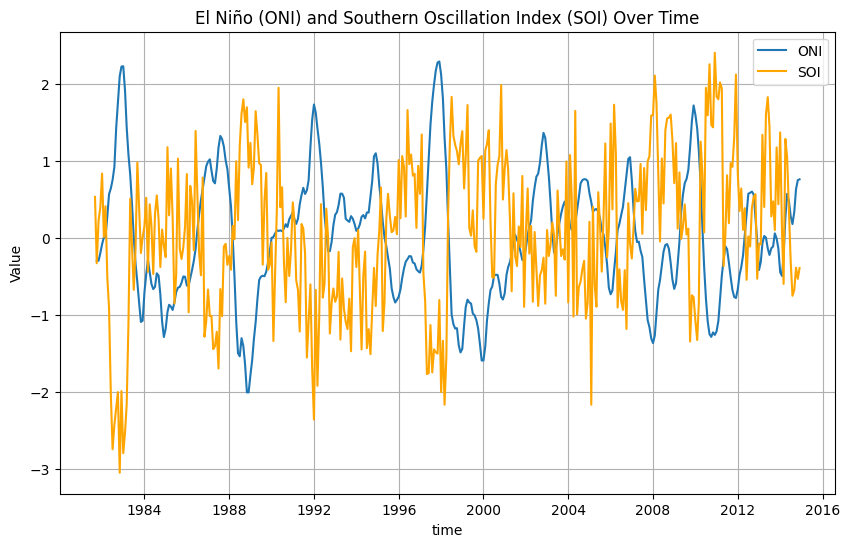

In [ ]:
# Plotting the two time series
plt.figure(figsize=(10, 6))
plt.plot(df_soi_oni.index, df_soi_oni['sst'], label='ONI')
plt.plot(df_soi_oni.index, df_soi_oni['SOI'], label='SOI', color='orange')
plt.xlabel('time')
plt.ylabel('Value')
plt.title('El Niño (ONI) and Southern Oscillation Index (SOI) Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig = px.line(data_frame=df_soi_oni.reset_index(), # Reset the index to make 'time' a column
              x='time',
              y=['sst', 'SOI'],
              labels={'ONI': 'Oceanic Niño Index (ONI)', 'SOI': 'Southern Oscillation Index (SOI)'},
              title="El Niño (ONI) and Southern Oscillation Index (SOI) Over Time")

# Update layout to add axis titles and refine appearance
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Value",
    title="El Niño (ONI) and Southern Oscillation Index (SOI) Over Time",
    legend_title="Index",
    template="plotly"
)

# Show the plot
fig.show()

# Precipitations

In [14]:
# Analysis on the average precipitaions in the north of Peru. The data can be downloaded from https://www.senamhi.gob.pe/site/descarga-datos/.
# We will be using the data from the station of Mallares
data_prep = pd.read_csv('/content/drive/My Drive/ElNiño/precipitations/mallares.txt', delim_whitespace=True, header=None,
                 names=['year', 'month', 'day', 'precipitation', 'max_temp', 'min_temp'])

<ipython-input-14-3742dddc6670>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_prep = pd.read_csv('/content/drive/My Drive/ElNiño/precipitations/mallares.txt', delim_whitespace=True, header=None,


In [20]:
# Values -99.9 are NaN values, so drop them
data_prep.replace(-99.9, np.nan, inplace=True)
data_prep = data_prep.dropna()

# Group by year and month
df_prep = data_prep.groupby(['year', 'month'])[['precipitation', 'max_temp', 'min_temp']].mean()

# Add datetime as index
df_prep = df_prep.reset_index()
df_prep['time'] = pd.to_datetime(df_prep['year'].astype(str) + '-' + df_prep['month'].astype(str) + '-' + '01', format='%Y-%m-%d')
df_prep['time'] = df_prep['time'].dt.strftime('%Y-%m-%d')
df_prep.set_index('time', inplace=True)

df_prep

,year,month,precipitation,max_temp,min_temp
time,,,,,
1961-01-01,1961,1,0.664516,34.251613,21.832258
1961-02-01,1961,2,0.064286,36.167857,21.725000
1961-03-01,1961,3,0.903226,34.493548,21.480645
1971-06-01,1971,6,0.000000,26.575000,16.300000
1971-07-01,1971,7,0.000000,27.338710,16.609677
...,...,...,...,...,...
2014-02-01,2014,2,0.060714,35.817857,22.389286
2014-03-01,2014,3,0.187097,36.419355,22.567742
2014-04-01,2014,4,0.283333,35.370000,21.406667


In [22]:
# Plot the SOI fluctuations
fig = px.line(x=df_prep.index, y=df_prep['precipitation'  ])
# Update layout
fig.update_layout(
    title="Precipitation Fluctuations",
    xaxis_title="Time",
    yaxis_title="Precipitations (mm)",
)
fig.show()